In [1]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import joblib
import pandas as pd
#warnings.filterwarnings("ignore")

model_directory = "../08_model_build/model"

In [2]:
#Read in the training data
X_train = pd.read_csv('../07_preprocess/model/X_train_dt10_4.csv').iloc[:, :-2]
Y_train = pd.read_csv('../07_preprocess/model/X_train_dt10_4.csv').iloc[:, -2]

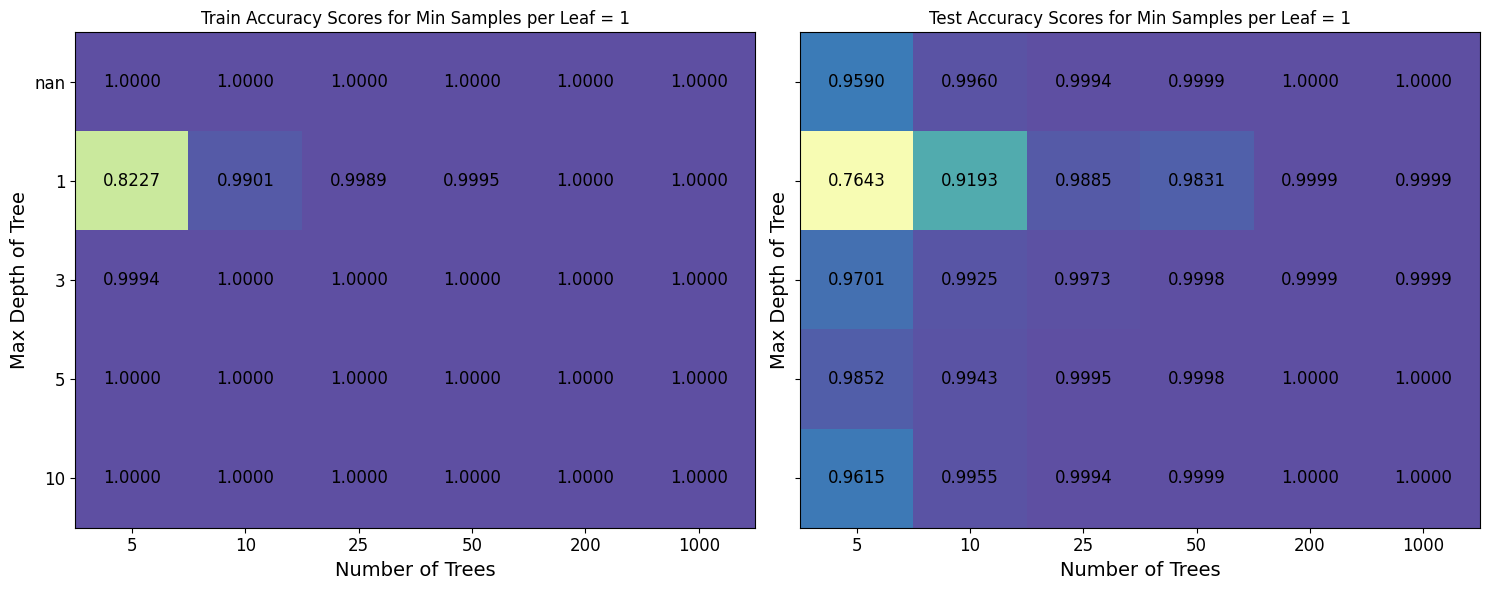

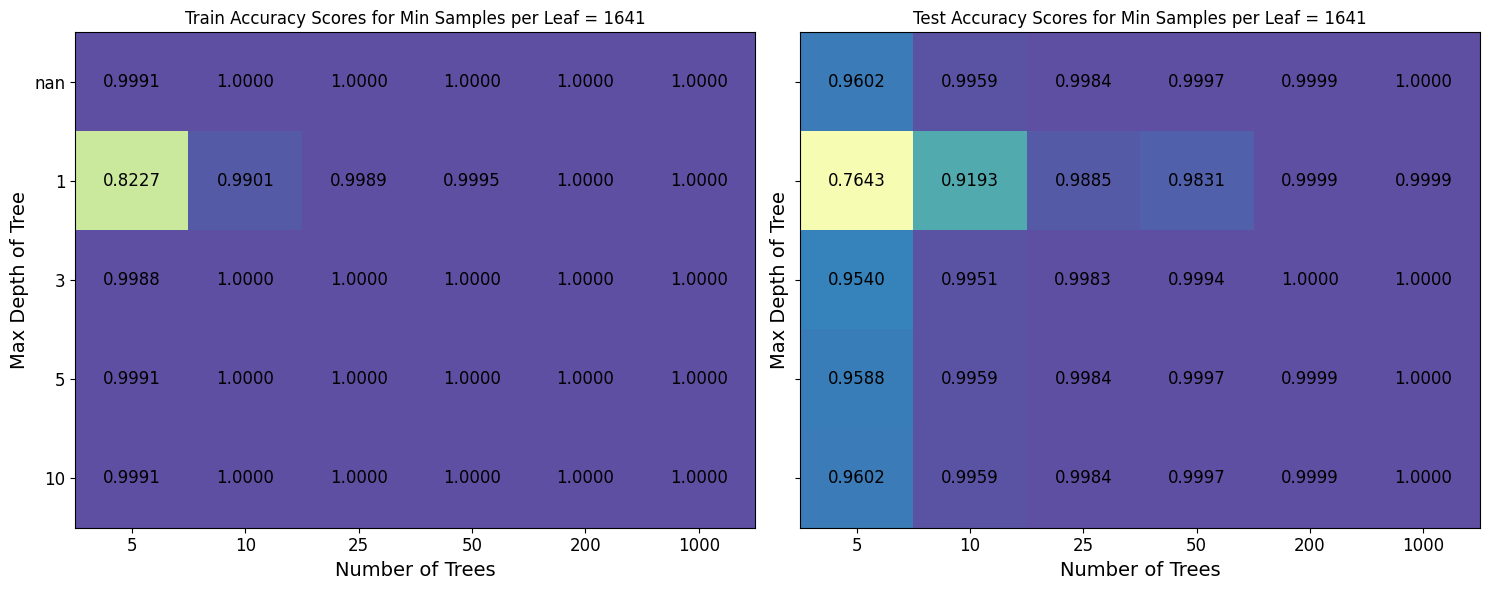

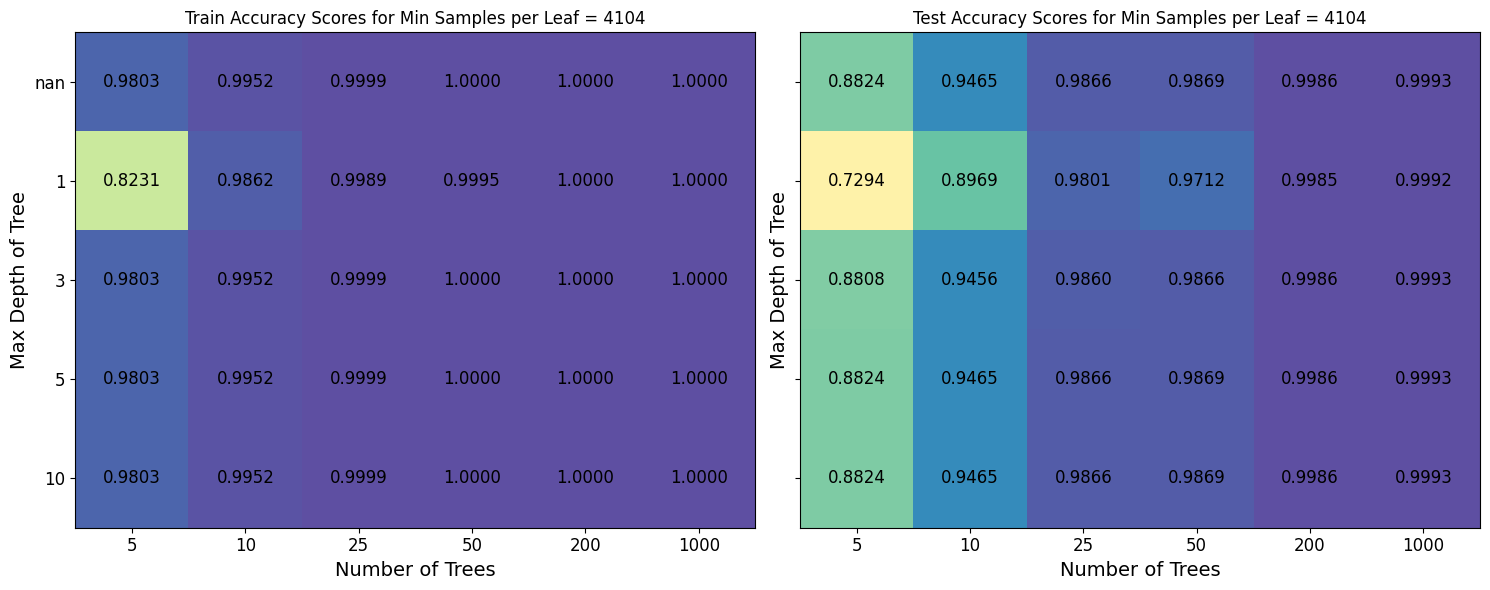

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# Load Grid Search Results
gridSearch1 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_0.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_score", "mean_test_score"]
]
gridSearch2 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_1.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_score", "mean_test_score"]
]
gridSearch3 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_2.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_score", "mean_test_score"]
]

# Compute Average over Runs
gridSearchAvg = gridSearch1.copy()
gridSearchAvg["mean_train_score"] = (gridSearch1["mean_train_score"] + gridSearch2["mean_train_score"] + gridSearch3["mean_train_score"]) / 3
gridSearchAvg["mean_test_score"] = (gridSearch1["mean_test_score"] + gridSearch2["mean_test_score"] + gridSearch3["mean_test_score"]) / 3

# Get Unique Values for Iteration
unique_min_samples_leaf = gridSearchAvg["param_rf__min_samples_leaf"].unique()

# Loop Over Each Unique `min_samples_leaf` Value
for min_samples_leaf in unique_min_samples_leaf:
    gridSearchdf2 = gridSearchAvg[gridSearchAvg["param_rf__min_samples_leaf"] == min_samples_leaf]

    # Create Pivot Tables to Ensure Correct Reshaping
    train_pivot = gridSearchdf2.pivot(index="param_rf__max_depth", columns="param_rf__n_estimators", values="mean_train_score")
    test_pivot = gridSearchdf2.pivot(index="param_rf__max_depth", columns="param_rf__n_estimators", values="mean_test_score")

#    YAXIS = train_pivot.index.astype('Int64').to_numpy()
    XAXIS = train_pivot.columns.to_list()
#    YAXIS = pd.to_numeric(train_pivot.index, errors='coerce').astype('Int64').to_numpy()
    YAXIS = train_pivot.index.to_list()
    YAXIS = [str(int(y)) if not pd.isna(y) else 'nan' for y in YAXIS] # ensure y label shown as integer

    
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
    titles = ["Train Accuracy Scores", "Test Accuracy Scores"]
    score_matrices = [train_pivot, test_pivot]

    for i in range(len(ax)):
        im = ax[i].imshow(score_matrices[i], vmin=0.5, vmax=1, cmap='Spectral', aspect='auto')
        ax[i].set_title(f"{titles[i]} for Min Samples per Leaf = {min_samples_leaf}")
        ax[i].set_xlabel("Number of Trees", fontsize=14)
        ax[i].set_xticks(np.arange(len(XAXIS)), labels=XAXIS, fontsize=12)#, rotation=45)
        ax[i].set_ylabel("Max Depth of Tree", fontsize=14)
        ax[i].set_yticks(np.arange(len(YAXIS)), labels=YAXIS, fontsize=12)
        #fig.colorbar(im, ax=ax[i], fraction=0.046, pad=0.04)  # Add colorbar

        # Add Value Annotations
        for x in range(len(XAXIS)):
            for y in range(len(YAXIS)):
                ax[i].text(x, y, f"{score_matrices[i].iloc[y, x]:.4f}", ha="center", va="center", color="black", fontsize=12)
        ax[i].grid(False)
    plt.tight_layout()
    plt.savefig(f"plots/gridsearchresults_leaf{min_samples_leaf}.jpg", dpi=400)
    plt.show()


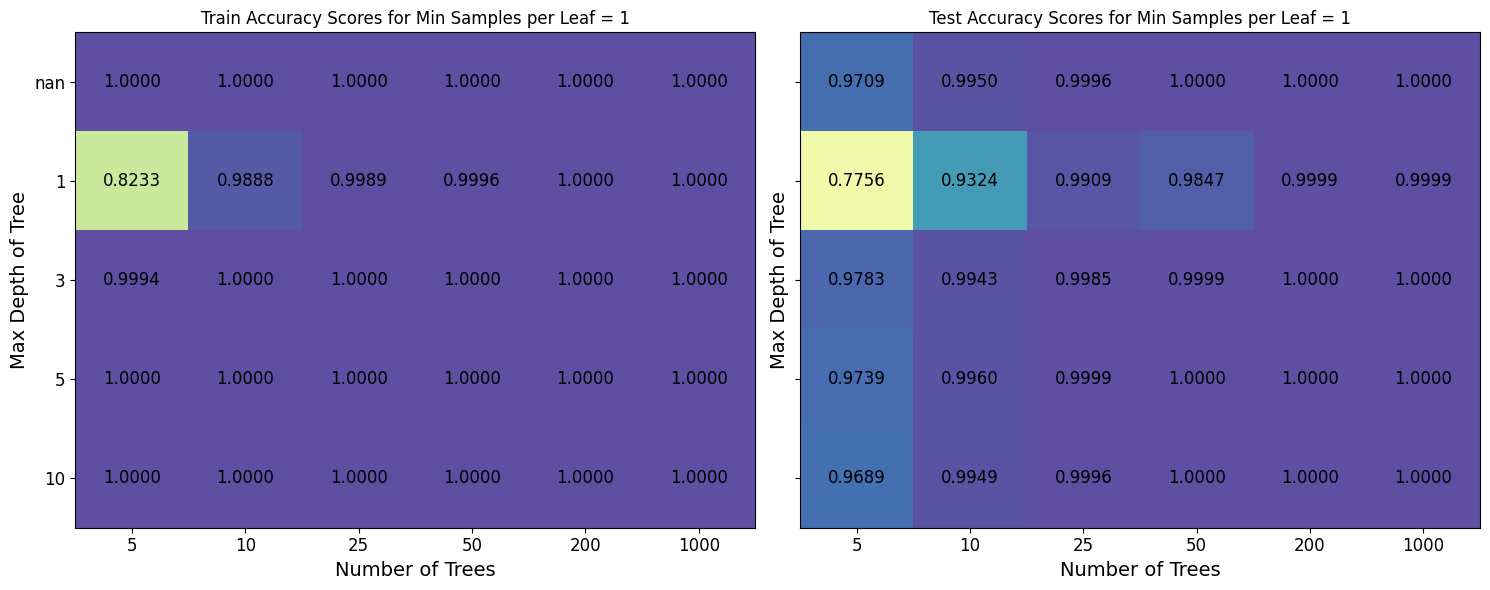

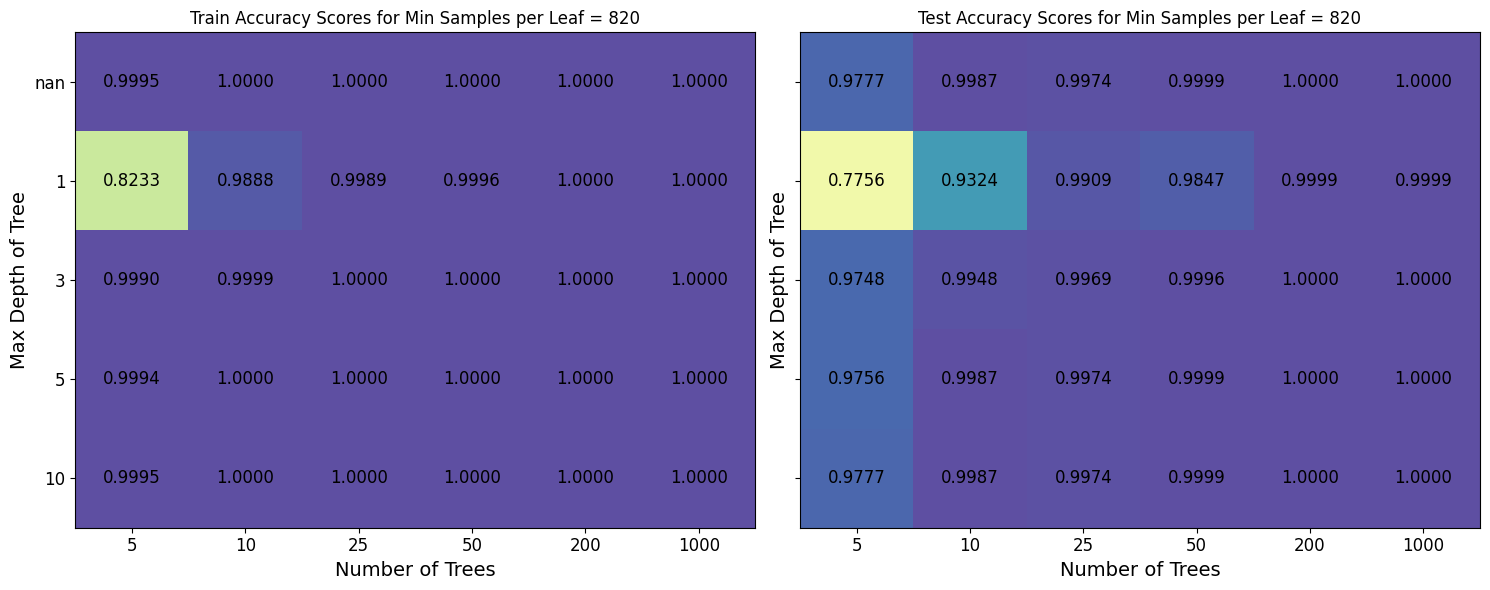

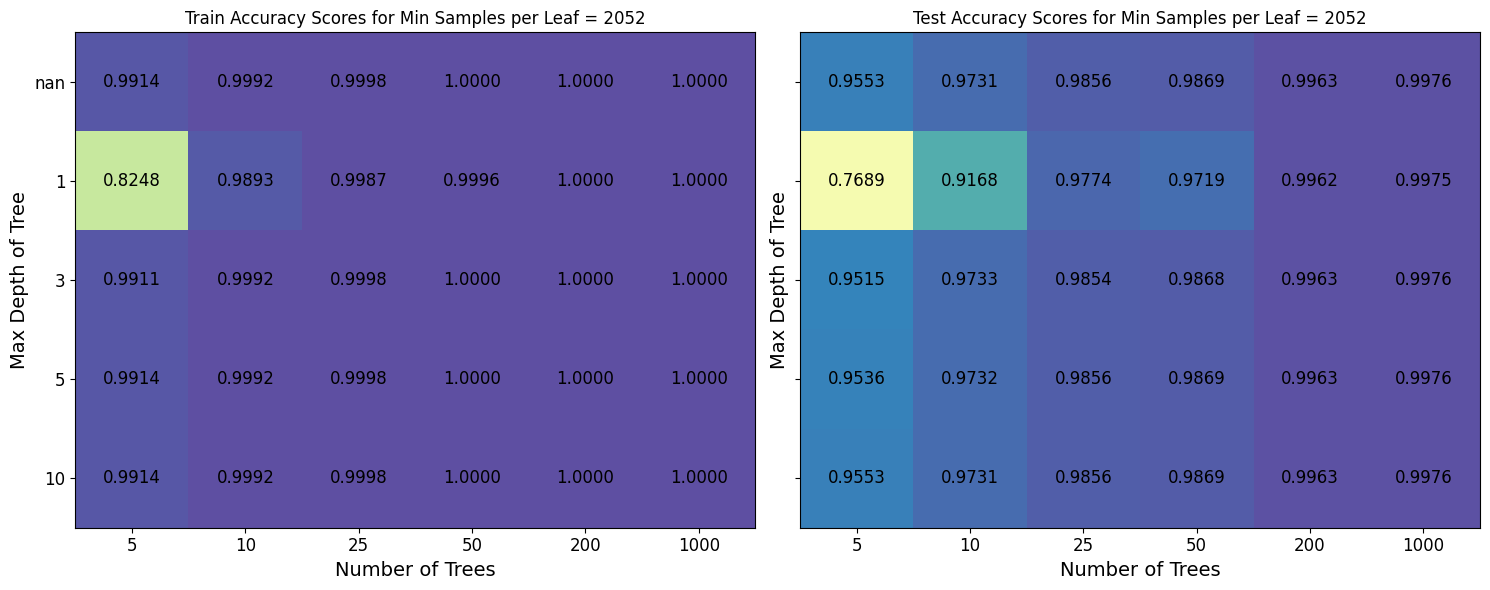

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# Load Grid Search Results
gridSearch1 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_t10_0.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_accuracy", "mean_test_accuracy"]
]
gridSearch2 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_t10_1.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_accuracy", "mean_test_accuracy"]
]
gridSearch3 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_t10_2.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_accuracy", "mean_test_accuracy"]
]

# Compute Average over Runs
gridSearchAvg = gridSearch1.copy()
gridSearchAvg["mean_train_accuracy"] = (gridSearch1["mean_train_accuracy"] + gridSearch2["mean_train_accuracy"] + gridSearch3["mean_train_accuracy"]) / 3
gridSearchAvg["mean_test_accuracy"] = (gridSearch1["mean_test_accuracy"] + gridSearch2["mean_test_accuracy"] + gridSearch3["mean_test_accuracy"]) / 3

# Get Unique Values for Iteration
unique_min_samples_leaf = gridSearchAvg["param_rf__min_samples_leaf"].unique()

# Loop Over Each Unique `min_samples_leaf` Value
for min_samples_leaf in unique_min_samples_leaf:
    gridSearchdf2 = gridSearchAvg[gridSearchAvg["param_rf__min_samples_leaf"] == min_samples_leaf]

    # Create Pivot Tables to Ensure Correct Reshaping
    train_pivot = gridSearchdf2.pivot(index="param_rf__max_depth", columns="param_rf__n_estimators", values="mean_train_accuracy")
    test_pivot = gridSearchdf2.pivot(index="param_rf__max_depth", columns="param_rf__n_estimators", values="mean_test_accuracy")

#    YAXIS = train_pivot.index.astype('Int64').to_numpy()
    XAXIS = train_pivot.columns.to_list()
#    YAXIS = pd.to_numeric(train_pivot.index, errors='coerce').astype('Int64').to_numpy()
    YAXIS = train_pivot.index.to_list()
    YAXIS = [str(int(y)) if not pd.isna(y) else 'nan' for y in YAXIS] # ensure y label shown as integer

    
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
    titles = ["Train Accuracy Scores", "Test Accuracy Scores"]
    score_matrices = [train_pivot, test_pivot]

    for i in range(len(ax)):
        im = ax[i].imshow(score_matrices[i], vmin=0.5, vmax=1, cmap='Spectral', aspect='auto')
        ax[i].set_title(f"{titles[i]} for Min Samples per Leaf = {min_samples_leaf}")
        ax[i].set_xlabel("Number of Trees", fontsize=14)
        ax[i].set_xticks(np.arange(len(XAXIS)), labels=XAXIS, fontsize=12)#, rotation=45)
        ax[i].set_ylabel("Max Depth of Tree", fontsize=14)
        ax[i].set_yticks(np.arange(len(YAXIS)), labels=YAXIS, fontsize=12)
        #fig.colorbar(im, ax=ax[i], fraction=0.046, pad=0.04)  # Add colorbar

        # Add Value Annotations
        for x in range(len(XAXIS)):
            for y in range(len(YAXIS)):
                ax[i].text(x, y, f"{score_matrices[i].iloc[y, x]:.4f}", ha="center", va="center", color="black", fontsize=12)
        ax[i].grid(False)
    plt.tight_layout()
    plt.savefig(f"plots/gridsearchresults_leaf{min_samples_leaf}.jpg", dpi=400)
    plt.show()


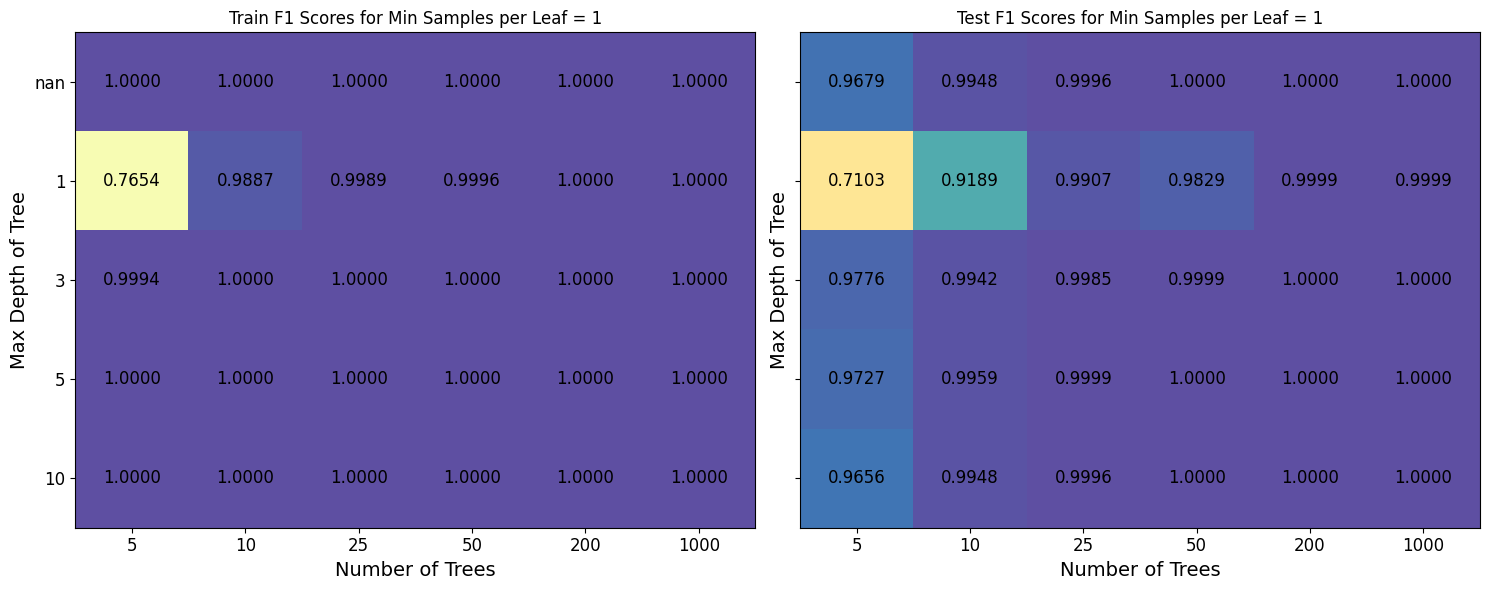

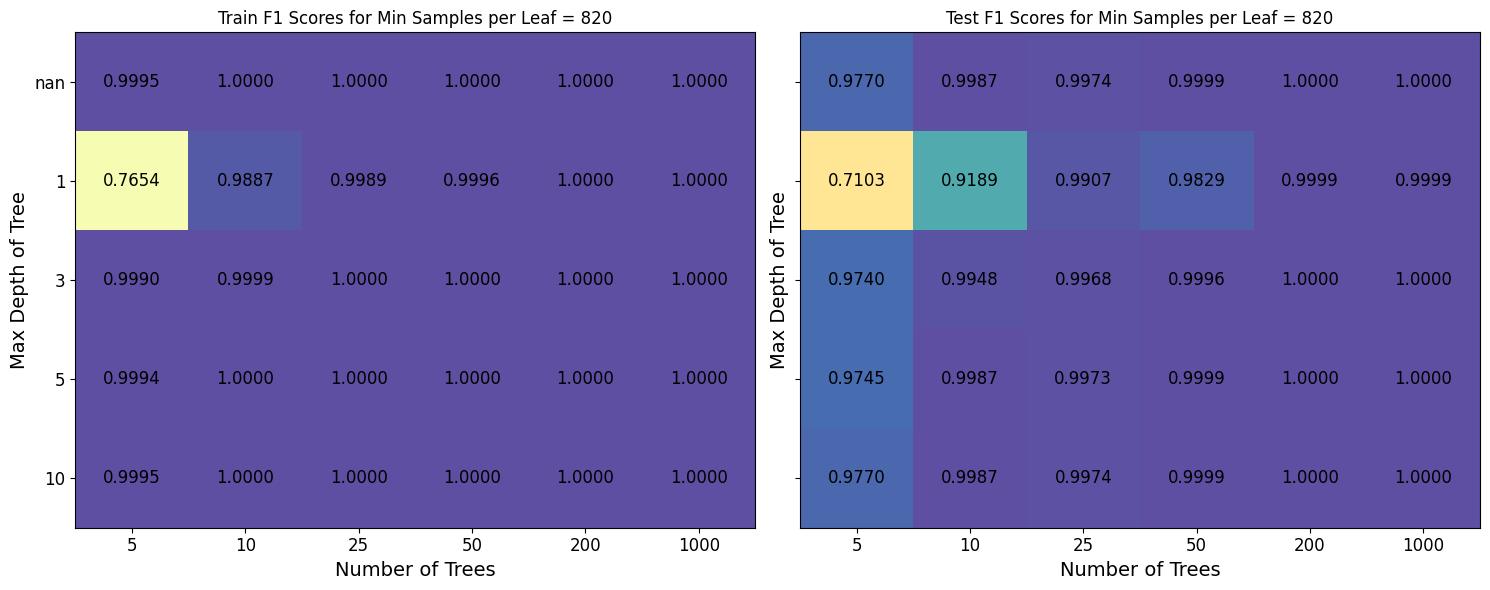

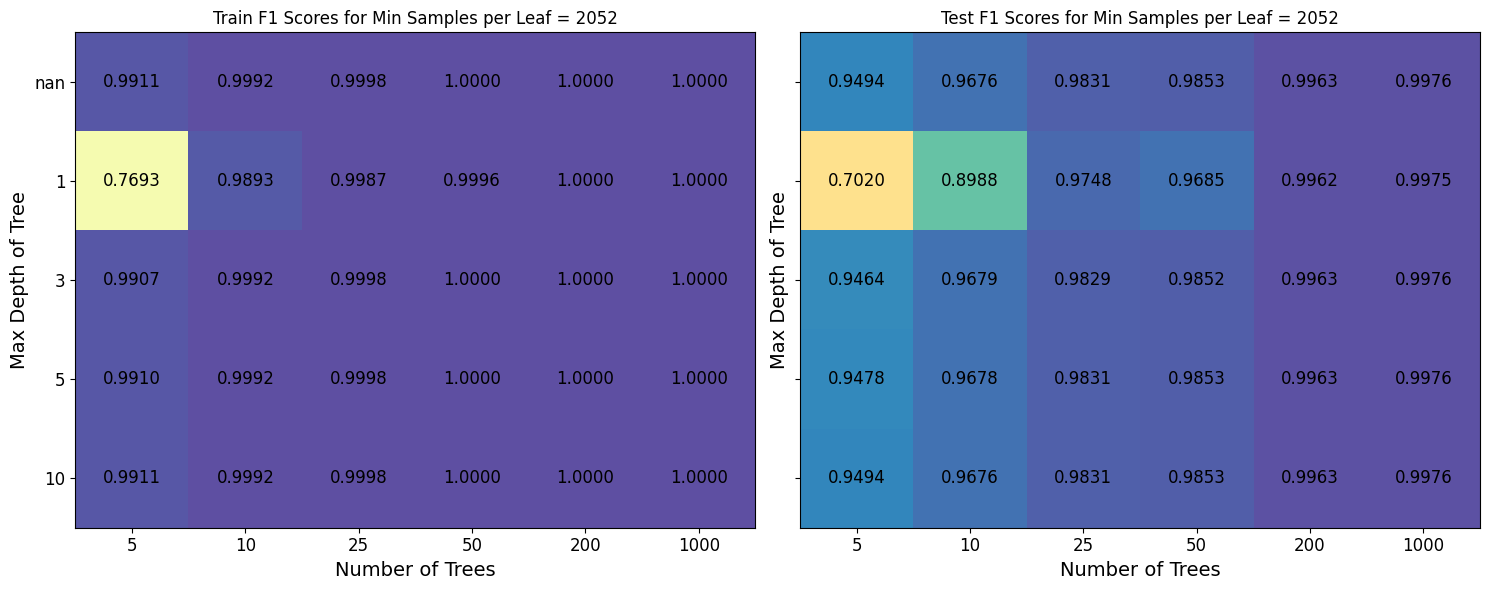

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# Load Grid Search Results
gridSearch1 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_t10_0.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_macro_f1", "mean_test_macro_f1"]
]
gridSearch2 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_t10_1.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_macro_f1", "mean_test_macro_f1"]
]
gridSearch3 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_t10_2.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_macro_f1", "mean_test_macro_f1"]
]

# Compute Average over Runs
gridSearchAvg = gridSearch1.copy()
gridSearchAvg["mean_train_macro_f1"] = (gridSearch1["mean_train_macro_f1"] + gridSearch2["mean_train_macro_f1"] + gridSearch3["mean_train_macro_f1"]) / 3
gridSearchAvg["mean_test_macro_f1"] = (gridSearch1["mean_test_macro_f1"] + gridSearch2["mean_test_macro_f1"] + gridSearch3["mean_test_macro_f1"]) / 3

# Get Unique Values for Iteration
unique_min_samples_leaf = gridSearchAvg["param_rf__min_samples_leaf"].unique()

# Loop Over Each Unique `min_samples_leaf` Value
for min_samples_leaf in unique_min_samples_leaf:
    gridSearchdf2 = gridSearchAvg[gridSearchAvg["param_rf__min_samples_leaf"] == min_samples_leaf]

    # Create Pivot Tables to Ensure Correct Reshaping
    train_pivot = gridSearchdf2.pivot(index="param_rf__max_depth", columns="param_rf__n_estimators", values="mean_train_macro_f1")
    test_pivot = gridSearchdf2.pivot(index="param_rf__max_depth", columns="param_rf__n_estimators", values="mean_test_macro_f1")

#    YAXIS = train_pivot.index.astype('Int64').to_numpy()
    XAXIS = train_pivot.columns.to_list()
#    YAXIS = pd.to_numeric(train_pivot.index, errors='coerce').astype('Int64').to_numpy()
    YAXIS = train_pivot.index.to_list()
    YAXIS = [str(int(y)) if not pd.isna(y) else 'nan' for y in YAXIS] # ensure y label shown as integer

    
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
    titles = ["Train F1 Scores", "Test F1 Scores"]
    score_matrices = [train_pivot, test_pivot]

    for i in range(len(ax)):
        im = ax[i].imshow(score_matrices[i], vmin=0.5, vmax=1, cmap='Spectral', aspect='auto')
        ax[i].set_title(f"{titles[i]} for Min Samples per Leaf = {min_samples_leaf}")
        ax[i].set_xlabel("Number of Trees", fontsize=14)
        ax[i].set_xticks(np.arange(len(XAXIS)), labels=XAXIS, fontsize=12)#, rotation=45)
        ax[i].set_ylabel("Max Depth of Tree", fontsize=14)
        ax[i].set_yticks(np.arange(len(YAXIS)), labels=YAXIS, fontsize=12)
        #fig.colorbar(im, ax=ax[i], fraction=0.046, pad=0.04)  # Add colorbar

        # Add Value Annotations
        for x in range(len(XAXIS)):
            for y in range(len(YAXIS)):
                ax[i].text(x, y, f"{score_matrices[i].iloc[y, x]:.4f}", ha="center", va="center", color="black", fontsize=12)
        ax[i].grid(False)
    plt.tight_layout()
    plt.savefig(f"plots/gridsearchresults_leaf{min_samples_leaf}.jpg", dpi=400)
    plt.show()


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# Load Grid Search Results
gridSearch1 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_0.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_score", "mean_test_score"]
]
gridSearch2 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_1.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_score", "mean_test_score"]
]
gridSearch3 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_2.pkl').cv_results_)[
    ["param_rf__min_samples_leaf", "param_rf__max_depth", "param_rf__n_estimators", "mean_train_score", "mean_test_score"]
]

# Compute Average over Runs
gridSearchAvg = gridSearch1.copy()
gridSearchAvg["mean_train_score"] = (gridSearch1["mean_train_score"] + gridSearch2["mean_train_score"] + gridSearch3["mean_train_score"]) / 3
gridSearchAvg["mean_test_score"] = (gridSearch1["mean_test_score"] + gridSearch2["mean_test_score"] + gridSearch3["mean_test_score"]) / 3


In [4]:
df =pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_timeseries_t10_0.pkl').cv_results_)

In [5]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__min_samples_leaf,param_rf__n_estimators,params,split0_test_accuracy,split1_test_accuracy,...,split2_train_macro_f1,split3_train_macro_f1,split4_train_macro_f1,split5_train_macro_f1,split6_train_macro_f1,split7_train_macro_f1,split8_train_macro_f1,split9_train_macro_f1,mean_train_macro_f1,std_train_macro_f1
0,0.703843,0.375530,0.029539,0.006959,1.0,1,5,"{'rf__max_depth': 1, 'rf__min_samples_leaf': 1...",0.688380,0.647500,...,0.650514,0.660332,0.658985,0.656984,0.657002,0.657484,0.657675,0.658631,0.657175,0.002979
1,1.335494,0.849941,0.036553,0.010306,1.0,1,10,"{'rf__max_depth': 1, 'rf__min_samples_leaf': 1...",0.940222,0.897065,...,0.992548,0.985530,0.990793,0.988599,0.975562,0.976811,0.971989,0.974232,0.981320,0.010197
2,3.242373,1.921952,0.038040,0.006337,1.0,1,25,"{'rf__max_depth': 1, 'rf__min_samples_leaf': 1...",0.999732,0.901890,...,0.997633,0.999799,0.999384,0.999777,0.999789,0.997972,0.994817,0.995263,0.998276,0.001806
3,6.166050,3.528544,0.044154,0.003678,1.0,1,50,"{'rf__max_depth': 1, 'rf__min_samples_leaf': 1...",0.999866,0.999598,...,1.000000,0.999967,0.999705,0.999799,0.999904,0.999816,0.999658,0.999209,0.999806,0.000232
4,24.044446,13.415406,0.071316,0.005267,1.0,1,200,"{'rf__max_depth': 1, 'rf__min_samples_leaf': 1...",1.000000,1.000000,...,1.000000,1.000000,1.000000,0.999978,0.999981,0.999933,0.999896,0.999906,0.999969,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,3.475322,2.363084,0.029182,0.002866,NaN,2052,10,"{'rf__max_depth': None, 'rf__min_samples_leaf'...",0.748157,0.989412,...,0.999911,1.000000,0.999839,0.999978,0.999981,0.999983,0.999896,0.999960,0.999525,0.001274
86,8.050489,5.654268,0.032476,0.005400,NaN,2052,25,"{'rf__max_depth': None, 'rf__min_samples_leaf'...",0.777108,0.999330,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999732,0.000803
87,15.885014,11.094381,0.041117,0.006330,NaN,2052,50,"{'rf__max_depth': None, 'rf__min_samples_leaf'...",0.800027,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
88,59.781413,40.662426,0.070756,0.010866,NaN,2052,200,"{'rf__max_depth': None, 'rf__min_samples_leaf'...",0.961399,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [6]:
df.columns.to_list()

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_rf__max_depth',
 'param_rf__min_samples_leaf',
 'param_rf__n_estimators',
 'params',
 'split0_test_accuracy',
 'split1_test_accuracy',
 'split2_test_accuracy',
 'split3_test_accuracy',
 'split4_test_accuracy',
 'split5_test_accuracy',
 'split6_test_accuracy',
 'split7_test_accuracy',
 'split8_test_accuracy',
 'split9_test_accuracy',
 'mean_test_accuracy',
 'std_test_accuracy',
 'rank_test_accuracy',
 'split0_train_accuracy',
 'split1_train_accuracy',
 'split2_train_accuracy',
 'split3_train_accuracy',
 'split4_train_accuracy',
 'split5_train_accuracy',
 'split6_train_accuracy',
 'split7_train_accuracy',
 'split8_train_accuracy',
 'split9_train_accuracy',
 'mean_train_accuracy',
 'std_train_accuracy',
 'split0_test_macro_f1',
 'split1_test_macro_f1',
 'split2_test_macro_f1',
 'split3_test_macro_f1',
 'split4_test_macro_f1',
 'split5_test_macro_f1',
 'split6_test_macro_f1',
 'split7_test_macro_f1',
 'split8

In [10]:

# Filter models with perfect accuracy
best_models = df[df["mean_test_accuracy"] == 1.0]

# Sort by lowest std deviation in accuracy
best_model = best_models.sort_values(by="std_test_accuracy")#.iloc[0]

In [12]:
best_model.std_test_accuracy

40    0.0
41    0.0
58    0.0
59    0.0
76    0.0
77    0.0
Name: std_test_accuracy, dtype: float64

In [11]:
df.mean_test_score

0     0.731418
1     0.889576
2     0.981696
3     0.999605
4     0.999839
        ...   
85    0.935468
86    0.999635
87    0.984678
88    0.999371
89    0.998450
Name: mean_test_score, Length: 90, dtype: float64

In [12]:
df.mean_test_score.sort_values()

0     0.731418
6     0.731418
12    0.749576
13    0.871959
7     0.889576
        ...   
57    1.000000
77    1.000000
76    1.000000
75    1.000000
22    1.000000
Name: mean_test_score, Length: 90, dtype: float64

In [13]:
df[df.mean_test_score<1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__min_samples_leaf,param_rf__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.783098,0.460263,0.041192,0.013344,1.0,1,5,"{'rf__max_depth': 1, 'rf__min_samples_leaf': 1...",0.685453,0.721930,...,0.731418,0.025408,89,0.735088,0.734722,0.744225,0.743841,0.743202,0.740216,0.004350
1,1.358034,0.853018,0.046644,0.012856,1.0,1,10,"{'rf__max_depth': 1, 'rf__min_samples_leaf': 1...",0.934284,0.968567,...,0.889576,0.091265,85,0.994737,0.993238,0.989717,0.976279,0.973158,0.985426,0.008948
2,3.183647,1.839983,0.053852,0.011081,1.0,1,25,"{'rf__max_depth': 1, 'rf__min_samples_leaf': 1...",0.938962,0.973465,...,0.981696,0.023507,73,0.998246,0.998063,0.999366,0.999817,0.994123,0.997923,0.002012
3,5.914346,3.378925,0.058754,0.004622,1.0,1,50,"{'rf__max_depth': 1, 'rf__min_samples_leaf': 1...",0.999196,0.999561,...,0.999605,0.000243,41,1.000000,1.000000,0.999732,0.999909,0.999532,0.999835,0.000180
4,22.863783,12.192400,0.094807,0.007008,1.0,1,200,"{'rf__max_depth': 1, 'rf__min_samples_leaf': 1...",1.000000,1.000000,...,0.999839,0.000198,31,1.000000,1.000000,0.999976,0.999982,0.999898,0.999971,0.000038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2.670730,1.866579,0.039947,0.005233,NaN,4104,10,"{'rf__max_depth': None, 'rf__min_samples_leaf'...",0.846199,0.831798,...,0.935468,0.078898,79,0.996857,0.999817,0.999903,0.999909,0.999942,0.999285,0.001215
86,6.162632,4.398165,0.046524,0.006578,NaN,4104,25,"{'rf__max_depth': None, 'rf__min_samples_leaf'...",0.998538,0.999635,...,0.999635,0.000566,37,0.999854,1.000000,1.000000,1.000000,1.000000,0.999971,0.000058
87,11.982958,8.668806,0.051146,0.006966,NaN,4104,50,"{'rf__max_depth': None, 'rf__min_samples_leaf'...",0.923465,1.000000,...,0.984678,0.030607,68,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
88,41.900252,28.994958,0.104395,0.015096,NaN,4104,200,"{'rf__max_depth': None, 'rf__min_samples_leaf'...",0.997076,1.000000,...,0.999371,0.001151,43,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [11]:
gd0 =joblib.load(f'{model_directory}/gridsearch_final_stratified_0.pkl')
gd1 =joblib.load(f'{model_directory}/gridsearch_final_stratified_1.pkl')
gd2 =joblib.load(f'{model_directory}/gridsearch_final_stratified_2.pkl')

In [12]:
print(gd0.best_params_)
print(gd1.best_params_)
print(gd2.best_params_)


{'rf__max_depth': 3, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 1000}
{'rf__max_depth': 3, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 50}
{'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 50}


In [13]:
print(gd0.best_score_)
print(gd1.best_score_)
print(gd2.best_score_)


1.0
1.0
1.0
